In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input,Dense, GlobalAveragePooling1D
from vit_keras import vit
# from tensorflow.keras.applications.vit import VIT
# from tensorflow.keras.datasets import cifar10

In [ ]:
#!pip install tensorflow-addons
#!pip install vit-keras

In [ ]:
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.cifar10.load_data()
x_train,x_test=x_train/255.0,x_test/255.0

In [ ]:
input_shape=x_train.shape[1:]
num_classes=10
vit_model=vit.vit_b16(
image_size=input_shape[0],
activation='softmax',
pretrained=True,
include_top=True,
pretrained_top=False,
classes=num_classes,
)

In [ ]:
vit_model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
vit_model.fit(x_train,y_train,epochs=5,batch_size=64,validation_split=0.2)

In [ ]:
test_loss,test_acc=vit_model.evaluate(x_test,y_test)
print(f"test accuracy:{test_acc}")

In [1]:
# importing datetime module for now()
import datetime
# using now() to get current time
current_time = datetime.datetime.now()
# Printing value of now.
print("The current time is:", current_time)

The current time is: 2024-02-18 13:56:47.201995


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import keras
import timm
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout 
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam,RMSprop
from sklearn.metrics import classification_report,confusion_matrix
import tensorflow as tf
import cv2
import os
from tensorflow.keras.layers import Input,Conv2D, MaxPooling2D,Flatten,Dense,GlobalAveragePooling2D
from vit_keras import vit
from tensorflow.keras import layers
#from tensorflow.keras.regularizers import regularizers
from tensorflow.keras import regularizers

C:\Users\NITRR\AppData\Roaming\Python\Python310\site-packages\tensorflow_addons\utils\tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [3]:
labels = ['ELS', 'ER','HL','LLS','ND','RUST']
img_size = 224
def get_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img))[...,::-1] #convert BGR to RGB format
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [4]:
#Now we can easily fetch our train and validation data.
train = get_data('path')
val = get_data('path')

C:\Users\NITRR\AppData\Local\Temp\ipykernel_14624\224560185.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(data)


In [5]:
x_train = []
y_train = []
x_val = []
y_val = []

for feature, label in train:
  x_train.append(feature)
  y_train.append(label)

for feature, label in val:
  x_val.append(feature)
  y_val.append(label)

# Normalize the data
x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255

x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)

In [6]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

In [7]:
input_shape = x_train.shape[1:]
num_classes = 6

# Define the input variable 'x'
x = Input(shape=input_shape)

In [8]:
# Create the ViT model
vit_model = vit.vit_b16(
    #VIt implementation
)

C:\Users\NITRR\AppData\Roaming\Python\Python310\site-packages\vit_keras\utils.py:81: UserWarning: Resizing position embeddings from 24, 24 to 14, 14
  warnings.warn(


In [10]:
#Let’s define a simple CNN model with 3 Convolutional layers followed by max-pooling layers. A dropout layer is added after the 3rd maxpool operation to avoid overfitting.

model = Sequential()
#CNN model layers

model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dense(6, activation="softmax",kernel_regularizer=regularizers.l2(0.1)))


In [ ]:
# Create the CNN model
cnn_model = tf.keras.Sequential([
Conv2D(128, (3, 3), activation='relu', input_shape=input_shape),
#32,64 original
Dropout(0.50),
MaxPooling2D((2, 2)),
Conv2D(64, (3, 3), activation='relu'),
Dropout(0.55),
MaxPooling2D((2, 2)),
# Conv2D(32, (3, 3), activation='relu'),
# Dropout(0.55),
# MaxPooling2D((2, 2)),
Flatten(),
])
#Let’s define a simple CNN model with 3 Convolutional layers followed
by max-pooling layers. A dropout layer is added after the 3rd maxpool
operation to avoid overfitting.
model = Sequential()
model.add(Conv2D(32,3,padding="same", activation="relu",
input_shape=(224,224,3)))
model.add(MaxPool2D())
model.add(Conv2D(32, 3, padding="same", activation="relu"))
model.add(MaxPool2D())
model.add(Conv2D(32, 3, padding="same", activation="relu")) #addredone
model.add(MaxPool2D())
model.add(Conv2D(64, 3, padding="same", activation="relu"))
model.add(MaxPool2D())
model.add(Dropout(0.9))
model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dense(6,
activation="softmax",kernel_regularizer=regularizers.l2(0.1)))
# Process the ViT and CNN outputs
vit_output = vit_model(x)
cnn_output = cnn_model(x)
# from tensorflow.keras.layers import Concatenate
# # Concatenate the ViT and CNN features
# combined_features = Concatenate()([vit_output, cnn_output])
# # Add a final classification layer
# output = Dense(num_classes, activation='softmax')(combined_features)
# # Create the combined model
# combined_model = tf.keras.Model(inputs=x, outputs=output)

In [ ]:
from tensorflow.keras.layers import Concatenate
from tensorflow.keras import regularizers
# Concatenate the ViT and CNN features
combined_features = Concatenate()([vit_output, cnn_output])
combined_features= Dropout(0.91)(combined_features)
# Add a final classification layer
output = Dense(num_classes,
activation='softmax',kernel_regularizer=regularizers.l2(0.001))
(combined_features)
# Create the combined model
combined_model = tf.keras.Model(inputs=x, outputs=output)
# Compile the combined model
opt = Adam(lr=0.001) #lr=0.0001,0.001
model.compile(optimizer = opt ,
loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# Compile the combined model
# opt = RMSprop(lr=0.0001) # Adjust learning rate as needed
# combined_model.compile(optimizer=opt,loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [11]:
# Process the ViT and CNN outputs
vit_output = vit_model(x)
cnn_output = cnn_model(x)

In [12]:
# from tensorflow.keras.layers import Concatenate
# # Concatenate the ViT and CNN features


# # Add a final classification layer


# # Create the combined model


from tensorflow.keras.layers import Concatenate
from tensorflow.keras import regularizers
# Concatenate the ViT and CNN features

combined_features= Dropout(0.91)(combined_features)
# Add a final classification layer
output = Dense(num_classes, activation='softmax',kernel_regularizer=regularizers.l2(0.001))(combined_features)

# Create the combined model
combined_model = tf.keras.Model(inputs=x, outputs=output)

In [13]:
# Compile the combined model
opt = Adam(lr=0.001) #lr=0.0001,0.001
model.compile(optimizer = opt , loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Compile the combined model
# opt = RMSprop(lr=0.0001)  # Adjust learning rate as needed
# combined_model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])


C:\Users\NITRR\AppData\Roaming\Python\Python310\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [1]:
#combined_model.summary()

In [15]:
history = model.fit(x_train,y_train, batch_size=20,epochs = 60 , validation_data = (x_val, y_val))

Epoch 1/60
396/396 [==============================] - 215s 543ms/step - loss: 1.4430 - accuracy: 0.4908 - val_loss: 0.8334 - val_accuracy: 0.6572
Epoch 2/60
396/396 [==============================] - 204s 515ms/step - loss: 0.9951 - accuracy: 0.6107 - val_loss: 0.7959 - val_accuracy: 0.6966
Epoch 3/60
396/396 [==============================] - 204s 515ms/step - loss: 0.9017 - accuracy: 0.6439 - val_loss: 0.8025 - val_accuracy: 0.6887
Epoch 4/60
396/396 [==============================] - 203s 513ms/step - loss: 0.7622 - accuracy: 0.7081 - val_loss: 0.4732 - val_accuracy: 0.7951
Epoch 5/60
396/396 [==============================] - 209s 528ms/step - loss: 0.6375 - accuracy: 0.7637 - val_loss: 0.4836 - val_accuracy: 0.7557
Epoch 6/60
396/396 [==============================] - 218s 552ms/step - loss: 0.5779 - accuracy: 0.7867 - val_loss: 0.3861 - val_accuracy: 0.8392
Epoch 7/60
396/396 [==============================] - 218s 549ms/step - loss: 0.4982 - accuracy: 0.8224 - val_loss: 0.4896 -

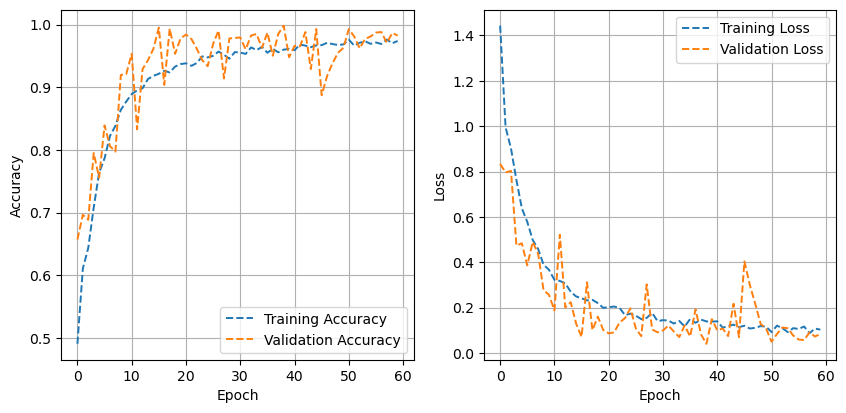

In [16]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(60)

plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy',linestyle='dashed',linewidth='1.4')
plt.plot(epochs_range, val_acc, label='Validation Accuracy',linestyle='dashed',linewidth='1.4')
plt.legend(loc='lower right')
plt.grid()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
#plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss',linestyle='dashed',linewidth='1.4')
plt.plot(epochs_range, val_loss, label='Validation Loss',linestyle='dashed',linewidth='1.4')
plt.legend(loc='upper right')
#plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid()
#plt.savefig('path')
plt.show()

In [18]:
predict_x=model.predict(x_val) 
classes_x=np.argmax(predict_x,axis=1)
print(classification_report(y_val, classes_x, target_names = ['ELS', 'ER','HL','LLS','ND','RUST']))

40/40 [==============================] - 5s 131ms/step
              precision    recall  f1-score   support

         ELS       0.99      0.90      0.94       209
          ER       1.00      1.00      1.00       210
          HL       0.93      0.99      0.96       216
         LLS       0.99      1.00      0.99       206
          ND       1.00      1.00      1.00       217
        RUST       1.00      1.00      1.00       211

    accuracy                           0.98      1269
   macro avg       0.98      0.98      0.98      1269
weighted avg       0.98      0.98      0.98      1269



In [19]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_val, classes_x))

[[189   0  17   3   0   0]
 [  0 210   0   0   0   0]
 [  2   0 214   0   0   0]
 [  0   0   0 206   0   0]
 [  0   0   0   0 217   0]
 [  0   0   0   0   0 211]]


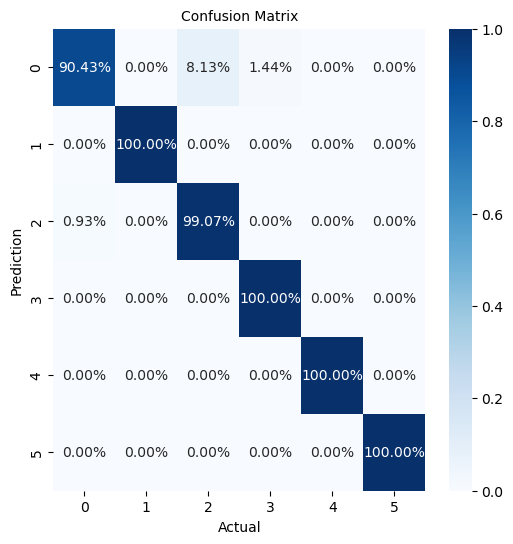

In [20]:
#Import the necessary libraries
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(6,6))
#compute the confusion matrix.
cm = confusion_matrix(y_val, classes_x)
 
#Plot the confusion matrix.
sns.heatmap(cm/np.sum(cm,axis=1).reshape(-1,1),cmap='Blues',annot=True,fmt='.2%')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.ylabel('Prediction',fontsize=10)
plt.xlabel('Actual',fontsize=10)
plt.title('Confusion Matrix',fontsize=10)
#plt.savefig('path)
plt.show()

In [21]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
precision_score(y_val, classes_x, average='micro')


0.9826635145784082

In [22]:
recall = recall_score(y_val, classes_x, average='micro')
print('recall=',recall)

recall= 0.9826635145784082


In [23]:
from sklearn.metrics import f1_score
f1_score(y_val, classes_x, average='micro')

0.9826635145784082

In [24]:
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import balanced_accuracy_score
a=matthews_corrcoef(y_val, classes_x)
b=balanced_accuracy_score(y_val, classes_x)
print(a)
print(b)

0.9793970280598394
0.9825078268060724


In [25]:
from sklearn.manifold import TSNE
# Extract the features from the last layer of the CNN
features = model.predict(x_train)
# Reduce the dimensionality of the features using t-SNE
tsne = TSNE(n_components=2, perplexity=30.0, early_exaggeration=12.0, learning_rate=200.0, n_iter=1000, n_iter_without_progress=300, min_grad_norm=1e-07, metric='euclidean', metric_params=None, init='pca', verbose=0, random_state=None, method='barnes_hut', angle=0.5, n_jobs=None)
features_embedded = tsne.fit_transform(features)

248/248 [==============================] - 36s 145ms/step


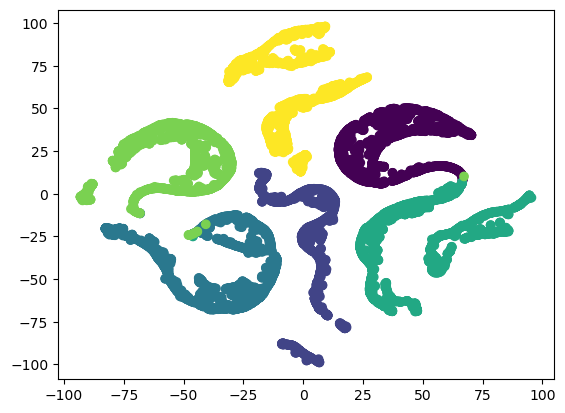

In [27]:
# Plot the results
plt.scatter(features_embedded[:, 0], features_embedded[:, 1], c=y_train)
#plt.axis('off')
#plt.savefig('path)
plt.show()

In [28]:
import lime
from lime import lime_image

1/1 [==============================] - 0s 23ms/step


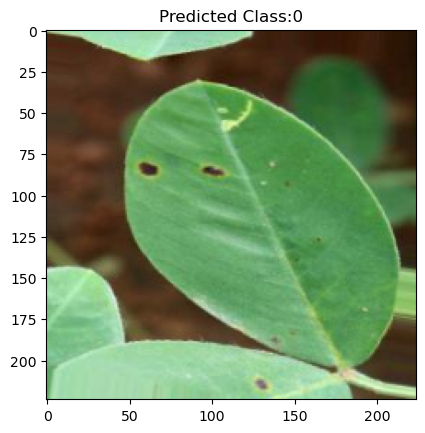

In [29]:
# Choose an image from the test set for explanation
image_index = 5
img = x_val[image_index]
img_array = np.expand_dims(img, axis=0)

# Make predictions
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions)

# Display the original image and predictions
plt.imshow(img.reshape(224, 224,3))
plt.title(f'Predicted Class:{predicted_class}')
plt.show()


In [30]:
# Create a LIME explainer for image classification
explainer = lime_image.LimeImageExplainer()

# Explain predictions
explanation = explainer.explain_instance(img_array[0], model.predict, top_labels=1, hide_color=0, num_samples=1000)

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 46ms/step


In [31]:
# explain predictions
explanation=explainer.explain_instance(img_array[0],model.predict,top_labels=1,hide_color=0,num_samples=1000)

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 76ms/step


In [32]:
#visualise LIME explanations with cv2.polylines
temp,mask=explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False,num_features=5,hide_rest=False)

In [33]:
#convert temp to uint8 for cv2.polylines
temp=(temp/2+0.5*mask[:,:,np.newaxis])*255
temp=temp.astype(np.uint8)

In [34]:
#find contours in the mask
contours,_=cv2.findContours(mask.astype(np.uint8),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)

#Draw contours on the image
cv2.polylines(temp,contours,isClosed=False,color=(0,255,0),thickness=2)

array([[[  0, 255,   0],
        [  0, 255,   0],
        [214, 254, 211],
        ...,
        [ 18,   9,   2],
        [ 18,   9,   2],
        [ 18,   9,   2]],

       [[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [ 18,   9,   2],
        [ 18,   9,   2],
        [ 18,   9,   2]],

       [[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [ 18,   9,   2],
        [ 18,   9,   2],
        [ 18,   9,   2]],

       ...,

       [[  0, 255,   0],
        [  0, 255,   0],
        [195, 254, 198],
        ...,
        [ 98, 113,  84],
        [100, 116,  86],
        [102, 117,  87]],

       [[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [ 76,  88,  61],
        [ 79,  91,  64],
        [ 82,  94,  66]],

       [[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [ 64,  73,  48],
        [ 67,  77,  52],
        [ 70,  80,  54]]

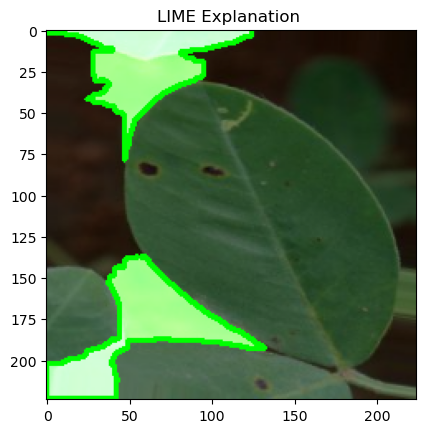

In [35]:
#display the image
plt.imshow(temp)
plt.title('LIME Explanation ')
#plt.savefig('path')
plt.show()

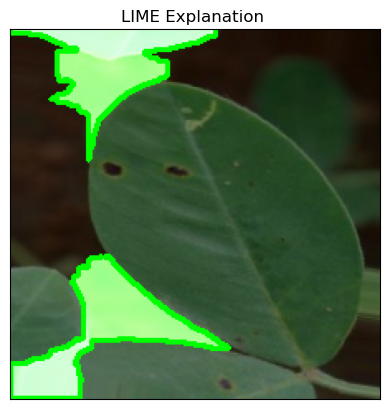

In [36]:
# Code for turning off x and y labels
plt.imshow(temp)
plt.title('LIME Explanation ')
plt.xticks([])  # Turn off x labels
plt.yticks([])  # Turn off y labels

#plt.savefig('F:/Paper6_vit+cnn/results/Rice_dataset_results/P6_r_proposed_lime.jpg', dpi=600)
plt.show()


In [38]:
# importing datetime module for now()
import datetime
# using now() to get current time
current_time = datetime.datetime.now()
# Printing value of now.
print("The current time is:", current_time)

The current time is: 2024-02-18 17:43:47.064923


In [36]:
#completed the code execution

SHAP method implementation